In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD

In [2]:
# Step 1: Load and preprocess data
features_csv = r'..\Data\features\features_with_labels.csv'
data = pd.read_csv(features_csv)  # Ganti dengan lokasi data Anda

In [3]:
# Ekstraksi fitur, misalnya 'features' berupa string yang perlu dikonversi menjadi array
X = np.array(data['features'].apply(lambda x: np.fromstring(x[1:-1], sep=',')).to_list())

# Konversi label menjadi angka dengan LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['folder_name'])  # Mengonversi label menjadi angka

In [4]:
num_classes=len(np.unique(y))
print(num_classes)
# Mengubah label menjadi format one-hot encoding
y = to_categorical(y, num_classes)

44


In [5]:
# Step 2: Split data menjadi training dan validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Membangun model MLP (Fully Connected Network)
model = Sequential()

# Menambahkan layer input dengan 128 fitur, dan beberapa layer tersembunyi
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))  # input_dim sesuai dengan dimensi fitur
model.add(Dense(128, activation='relu'))  # Layer tersembunyi
model.add(Dense(y_train.shape[1], activation='softmax'))  # Layer output (jumlah kelas)

# Step 4: Menyusun model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Step 5: Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=17, validation_data=(X_val, y_val))

Epoch 1/50
73/73 [==============================] - 1s 5ms/step - loss: 2.9110 - accuracy: 0.3089 - val_loss: 2.1942 - val_accuracy: 0.4759
Epoch 2/50
73/73 [==============================] - 0s 2ms/step - loss: 1.7187 - accuracy: 0.5782 - val_loss: 1.5821 - val_accuracy: 0.5916
Epoch 3/50
73/73 [==============================] - 0s 2ms/step - loss: 1.3462 - accuracy: 0.6581 - val_loss: 1.3558 - val_accuracy: 0.6109
Epoch 4/50
73/73 [==============================] - 0s 2ms/step - loss: 1.1472 - accuracy: 0.6968 - val_loss: 1.1615 - val_accuracy: 0.6945
Epoch 5/50
73/73 [==============================] - 0s 3ms/step - loss: 0.9900 - accuracy: 0.7355 - val_loss: 1.0679 - val_accuracy: 0.7138
Epoch 6/50
73/73 [==============================] - 0s 3ms/step - loss: 0.8769 - accuracy: 0.7597 - val_loss: 1.0293 - val_accuracy: 0.6785
Epoch 7/50
73/73 [==============================] - 0s 2ms/step - loss: 0.7853 - accuracy: 0.7847 - val_loss: 0.8980 - val_accuracy: 0.7331
Epoch 8/50
73/73 [==

In [7]:
# Step 6: Evaluasi model pada data validasi
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(y_val_true_classes, y_val_pred_classes)
print(f"Akurasi pada data validasi: {accuracy * 100:.2f}%")

# (Opsional) Menyimpan model
model.save('face_recognition_mlp_model.h5')

10/10 [==============================] - 0s 2ms/step
Akurasi pada data validasi: 91.64%


c:\Users\User\anaconda3\envs\deepface\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
num_classes

44

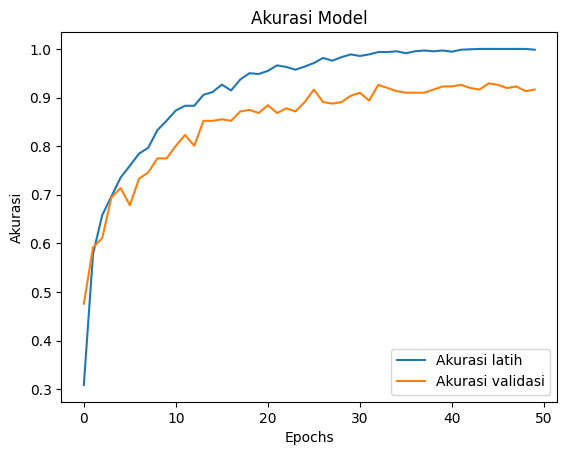

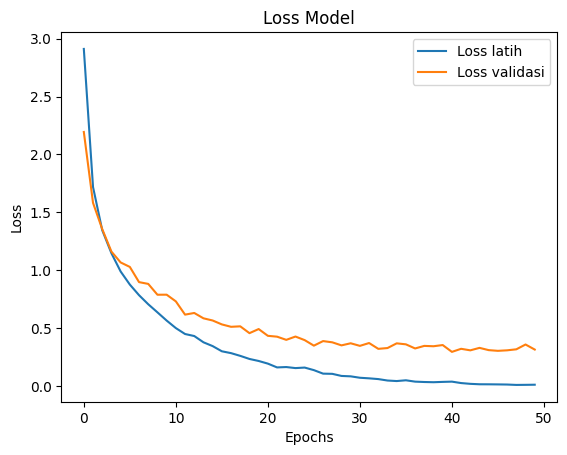

In [9]:
import matplotlib.pyplot as plt

# Plotting akurasi
plt.plot(history.history['accuracy'], label='Akurasi latih')
plt.plot(history.history['val_accuracy'], label='Akurasi validasi')
plt.title('Akurasi Model')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Loss latih')
plt.plot(history.history['val_loss'], label='Loss validasi')
plt.title('Loss Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
# Prediksi pada data validasi atau data uji lainnya
predictions = model.predict(X_val)

# Menampilkan prediksi untuk beberapa sampel
for i in range(5):
    print(f"Prediksi untuk gambar {i}: {predictions[i]} (label sebenarnya: {y_val[i]})")


10/10 [==============================] - 0s 1ms/step
Prediksi untuk gambar 0: [3.3494783e-11 5.8171318e-17 1.1857070e-22 3.0122893e-23 3.3754948e-24
 5.4898770e-21 4.6652152e-26 1.8783186e-36 2.5157595e-22 2.6580614e-16
 1.8125870e-14 7.1469347e-23 4.2710296e-17 2.5866082e-11 1.3650562e-17
 8.6392840e-23 9.9994028e-01 3.5060203e-19 2.9289529e-27 9.1708069e-27
 2.0758407e-24 5.6898342e-19 1.2508256e-19 0.0000000e+00 8.2656230e-20
 1.1334886e-20 8.2641746e-27 6.8926039e-13 3.8881939e-17 1.8314144e-15
 1.8468302e-20 9.9815110e-27 5.9712973e-05 3.0103336e-25 1.5008061e-17
 2.0759833e-24 1.3858608e-16 8.6329894e-31 1.0568460e-20 1.4695050e-18
 4.0309917e-25 6.8152206e-11 2.2419741e-27 2.3362002e-18] (label sebenarnya: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.])
Prediksi untuk gambar 1: [5.7105237e-13 5.9530663e-07 2.1618575e-07 4.9635155e-14 2.0224563e-05
 1.0912334e-12 1.4772999e-13 1.4955627e-05 6.

In [11]:
predicted_classes = predictions.argmax(axis=(1))
print(f"Prediksi kelas: {predicted_classes[:5]}")  # Menampilkan 5 prediksi pertama


Prediksi kelas: [16 42 22 22 18]


In [12]:
model.save('model.h5')

c:\Users\User\anaconda3\envs\deepface\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
